In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("Data/kitCapstoneJan24_data.csv", sep=";")

## selecting the country that we want

In [50]:
selected_country = 'Country A'
#Get rows with for country A

df_country_a = df[df['countryname'] == selected_country]
df_country_a

,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,sales_actuals_monthly__vehiclegroup04__retail,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## building a additional feature for months (1-12)

important for meanbymonth

In [51]:
df_country_a['month_normalized'] = df_country_a['month'] % 12
df_country_a

df_country_a = df_country_a[['month_normalized','month', 'countryname'] + [col for col in df_country_a.columns if col not in ['month_normalized','month', 'countryname']]]

df_country_a


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_actuals_monthly__vehiclegroup02__orderintake,sales_actuals_monthly__vehiclegroup02__retail,sales_actuals_monthly__vehiclegroup03__orderintake,sales_actuals_monthly__vehiclegroup03__retail,sales_actuals_monthly__vehiclegroup04__orderintake,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,1,Country A,296.0,352.0,739.0,471.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,904.0,528.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,1000.0,953.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,828.0,972.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,594.0,900.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## select an vehiclegroup

In [52]:
selcted_vehiclegroup = 'vehiclegroup01'

# delete all columns that are for a diffe

df1 = df_country_a

# create new dataframe with month and all columns containing vehiclegroup01
df2 = df1.filter(regex=selcted_vehiclegroup)
df2.head()

# drop columns in df1 which contain vehiclegroup
df3 = df1.drop(df1.filter(regex='vehiclegroup').columns, axis=1)
df3.head()

# merge df2 and df3 by index
df4 = df2.merge(df3, left_index=True, right_index=True)
df4.head()

# is there a column month in df4?
df4.columns.str.contains('month').any()
# column month should be the first column, second column is countryname
df4 = df4[['month_normalized','month', 'countryname'] + [col for col in df4.columns if col not in ['month_normalized','month', 'countryname']]]

In [53]:
# drop rows after row 258
#test = df4.drop(df4.index[258:])
test = df4

## build different dataframes for internal and external data

In [55]:
df_overall = test
df_overall

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,1,Country A,296.0,352.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,8,356,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,9,357,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,10,358,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,11,359,Country A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# dataframe with first 18 columns (internal data)
df_internal = test.iloc[:, :21]
df_internal.head()

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,leads__vehiclegroup01__lost,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,premises__vehiclegroup01__in_production,quota__vehiclegroup01__aq
360,1,1,Country B,333.0,476.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,2,2,Country B,342.0,489.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,3,3,Country B,407.0,582.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,4,4,Country B,332.0,474.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,5,5,Country B,338.0,483.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# dataframe with external features
df_external = test.iloc[:, 21:]
df_external = test['']df_external.
df_external.head()

In [28]:
# dataframe with external features
df_external = test.iloc[:, 21:]
df_external.loc[:, 'month_normalized'] = test['month_normalized']
df_external.head()

,global_consumer__alcoholic_beverages,global_consumer__apparel,global_consumer__apparel_footwear,global_consumer__appliances,global_consumer__automobiles,global_consumer__average_disposable_income_of_urban_households_nominal,global_consumer__average_disposable_income_of_urban_households_real,global_consumer__average_income,global_consumer__beer,global_consumer__building_materials_garden_supply,...,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi,month_normalized
360,345.194209,969.910323,1165.73952,149.466389,1264.398825,0.0,0.0,78.823747,202.239908,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
361,345.194209,969.910323,1165.73952,149.466389,1264.398825,0.0,0.0,193.093747,202.239908,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
362,345.194209,969.910323,1165.73952,149.466389,1264.398825,0.0,0.0,193.093747,202.239908,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
363,345.194209,969.910323,1165.73952,149.466389,1264.398825,0.0,0.0,193.093747,202.239908,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
364,345.194209,969.910323,1165.73952,149.466389,1264.398825,0.0,0.0,193.093747,202.239908,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [56]:
# dataframe with external features
df_external_info = test.iloc[:259,]
df_external_info.head()



,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,...,registrations__buildtype_suv,registrations__buildtype_transport,registrations__buildtype_van,registrations__buildtype_cabrio,registrations__buildtype_stufenheck,registrations__buildtype_kurzheck,registrations__buildtype_other,registrations__buildtype_pickup,registrations__buildtype_coupe,registrations__buildtype_kombi
0,1,1,Country A,296.0,352.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,Country A,414.0,372.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Country A,405.0,604.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,Country A,359.0,483.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,Country A,403.0,474.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# different stuff. nan lists



In [31]:
# Assuming df_external_info is a DataFrame
nan_columns = df_external_info.isna().any()
nan_counts = df_external_info.isna().sum()


# Create a list of rows
rows = []
for col, count in nan_counts.items():
    if count > 50:
        row = {"name": col, "NaN Count": count}
        rows.append(row)

# Create a DataFrame
nan_info_df = pd.DataFrame(rows, columns=["name", "NaN Count"])

nan_info_df

nan_info_df.to_csv('nan_list.csv')

# Create a list of rows
rows = []
for col, count in nan_counts.items():
    if count <= 50:
        row = {"name": col, "NaN Count": count}
        rows.append(row)

# Create a DataFrame
not_nan_info_df = pd.DataFrame(rows, columns=["name", "NaN Count"])

not_nan_info_df

not_nan_info_df.to_csv('not_nan_list.csv')


# building target values


In [33]:
country_a_y = y

In [36]:
country_a_y

49     215.0
50     250.0
51     222.0
52     179.0
53     209.0
       ...  
250    323.0
251    262.0
252    266.0
253    531.0
254    621.0
Name: sales_actuals_monthly__vehiclegroup01__orderintake_meanbymonth, Length: 206, dtype: float64

In [34]:
#take every row from 50 to 255 and 
#X = df_internal.iloc[49:255,:-3]
X = df_internal.iloc[49:255, ~df_internal.columns.str.contains('sales_actuals_monthly__vehiclegroup01__orderintake')]
y = df_internal.iloc[49:255, 3]

X_with_target = df_internal.iloc[49:255,:]


In [35]:
X

,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__retail,sales_flow_monthly__vehiclegroup01__cp8,sales_stock_monthly__vehiclegroup01__physical,sales_stock_monthly__vehiclegroup01__grossall,sales_stock_monthly__vehiclegroup01__netimporteranddealer,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leads__vehiclegroup01__won,leads__vehiclegroup01__first_touch_point,leads__vehiclegroup01__lost,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,premises__vehiclegroup01__flag_order_start,premises__vehiclegroup01__in_sales,premises__vehiclegroup01__flag_production_start,premises__vehiclegroup01__in_production,quota__vehiclegroup01__aq
409,2,50,Country B,384.0,NaN,NaN,NaN,NaN,28.0,223.0,NaN,NaN,NaN,0.0,127.0,0.0,0.0,0.0,0.0,NaN
410,3,51,Country B,518.0,NaN,NaN,NaN,NaN,35.0,302.0,NaN,NaN,NaN,0.0,203.0,0.0,0.0,0.0,0.0,NaN
411,4,52,Country B,697.0,NaN,NaN,NaN,NaN,33.0,314.0,NaN,NaN,NaN,0.0,188.0,0.0,0.0,143.0,71.0,NaN
412,5,53,Country B,562.0,NaN,NaN,NaN,NaN,32.0,282.0,NaN,NaN,NaN,0.0,212.0,0.0,0.0,0.0,71.0,NaN
413,6,54,Country B,593.0,NaN,NaN,NaN,NaN,35.0,327.0,NaN,NaN,NaN,0.0,320.0,0.0,0.0,0.0,71.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,11,251,Country B,482.0,841.0,216.0,657.0,336.0,87.0,556.0,657.0,565.0,96.0,571.0,469.0,0.0,417.0,0.0,536.0,586.0
611,0,252,Country B,1000.0,710.0,337.0,509.0,303.0,83.0,605.0,835.0,673.0,582.0,620.0,842.0,0.0,417.0,0.0,536.0,457.0
612,1,253,Country B,691.0,538.0,243.0,420.0,253.0,544.0,592.0,839.0,673.0,112.0,593.0,672.0,0.0,417.0,0.0,536.0,299.0
613,2,254,Country B,568.0,570.0,194.0,383.0,217.0,74.0,510.0,626.0,604.0,108.0,559.0,511.0,0.0,417.0,0.0,536.0,374.0


## testing wheel

In [60]:
use_all_features = True
# if false, assign checkup_features here
checkup_features = ['quota__vehiclegroup01__aq'],['sales_flow_monthly__vehiclegroup01__cp8']
input_df = df_overall

predict_future_values = True
if predict_future_values:
    range_predict = len(input_df)
else:
    range_predict = 257

#methods
mean_per_month = True
interpolation_linear = True
fill_zero = True

if use_all_features:
    checkup_features = input_df.columns
for feature in checkup_features:
    if input_df[feature].isna().any():
        if mean_per_month:
            # add mean per month
            # Fill in missing values using the corresponding month values
            month_means = {}
            for i in range(len(input_df)):
                month = input_df.iloc[i]['month_normalized']
                month_values = input_df.loc[input_df['month_normalized'] == month, feature]
                if not month_values.isnull().values.all():
                    month_means[month] = month_values.mean()

            # Fill in missing values using the corresponding month values
            input_df[feature+'_meanbymonth']=input_df[feature].loc[:].fillna(input_df['month_normalized'].map(month_means))

        if interpolation_linear:
            input_df[feature+'_interpolated_linear']=input_df[feature].interpolate(method='linear', limit_direction = 'both')

        if fill_zero:
            input_df[feature+'_fill_zero']=input_df[feature].fillna(0)

        input_df.drop(columns=feature, inplace=True)
output_df = input_df

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

KeyboardInterrupt: 

In [58]:
output_df.head()

,month_normalized,month,countryname,global_consumer__alcoholic_beverages,global_consumer__apparel,global_consumer__apparel_footwear,global_consumer__appliances,global_consumer__automobiles,global_consumer__average_disposable_income_of_urban_households_nominal,global_consumer__average_disposable_income_of_urban_households_real,...,registrations__buildtype_other_fill_zero,registrations__buildtype_pickup_meanbymonth,registrations__buildtype_pickup_interpolated_linear,registrations__buildtype_pickup_fill_zero,registrations__buildtype_coupe_meanbymonth,registrations__buildtype_coupe_interpolated_linear,registrations__buildtype_coupe_fill_zero,registrations__buildtype_kombi_meanbymonth,registrations__buildtype_kombi_interpolated_linear,registrations__buildtype_kombi_fill_zero
0,1,1,Country A,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,...,0.0,1692.0,2055.0,0.0,1646.5,1913.0,0.0,39726.5,48321.0,0.0
1,2,2,Country A,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,...,0.0,1651.0,2055.0,0.0,1681.5,1913.0,0.0,40390.5,48321.0,0.0
2,3,3,Country A,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,...,0.0,1818.5,2055.0,0.0,2210.5,1913.0,0.0,42680.5,48321.0,0.0
3,4,4,Country A,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,...,0.0,1403.5,2055.0,0.0,1496.0,1913.0,0.0,28910.5,48321.0,0.0
4,5,5,Country A,87.206968,255.462236,301.743202,41.505972,230.716125,0.0,0.0,...,0.0,1677.0,2055.0,0.0,1739.0,1913.0,0.0,32115.0,48321.0,0.0


In [59]:
output_df.to_csv('model_data_with_own_predictions.csv')

## SHAP

In [42]:
import xgboost
import shap
from sklearn import metrics
import matplotlib
shap.initjs()

In [44]:
# Drop countryname column and replace with numerical values
countryMapping = {'Country A': 1, 'Country B': 2, 'Country C': 3, 'Country D': 4}
X['countryNo'] = X['countryname'].map(countryMapping)
X = X.drop('countryname', axis=1)
X.dtypes

month_normalized                                                     int64
month                                                                int64
sales_actuals_monthly__vehiclegroup01__retail                      float64
sales_flow_monthly__vehiclegroup01__cp8                            float64
sales_stock_monthly__vehiclegroup01__physical                      float64
sales_stock_monthly__vehiclegroup01__grossall                      float64
sales_stock_monthly__vehiclegroup01__netimporteranddealer          float64
customer_vehicle_relationships__vehiclegroup01__terminated_cars    float64
customer_vehicle_relationships__vehiclegroup01__active_cars        float64
leads__vehiclegroup01__won                                         float64
leads__vehiclegroup01__first_touch_point                           float64
leads__vehiclegroup01__lost                                        float64
leasing_contracts__vehiclegroup01__end                             float64
leasing_contracts__vehicl

In [45]:
model = xgboost.XGBRegressor().fit(X, y)

print('Accuracy Score of the Model is: ',model.score(X, y))

explainer = shap.Explainer(model)
shap_values = explainer(X)

Accuracy Score of the Model is:  0.9999999965933093


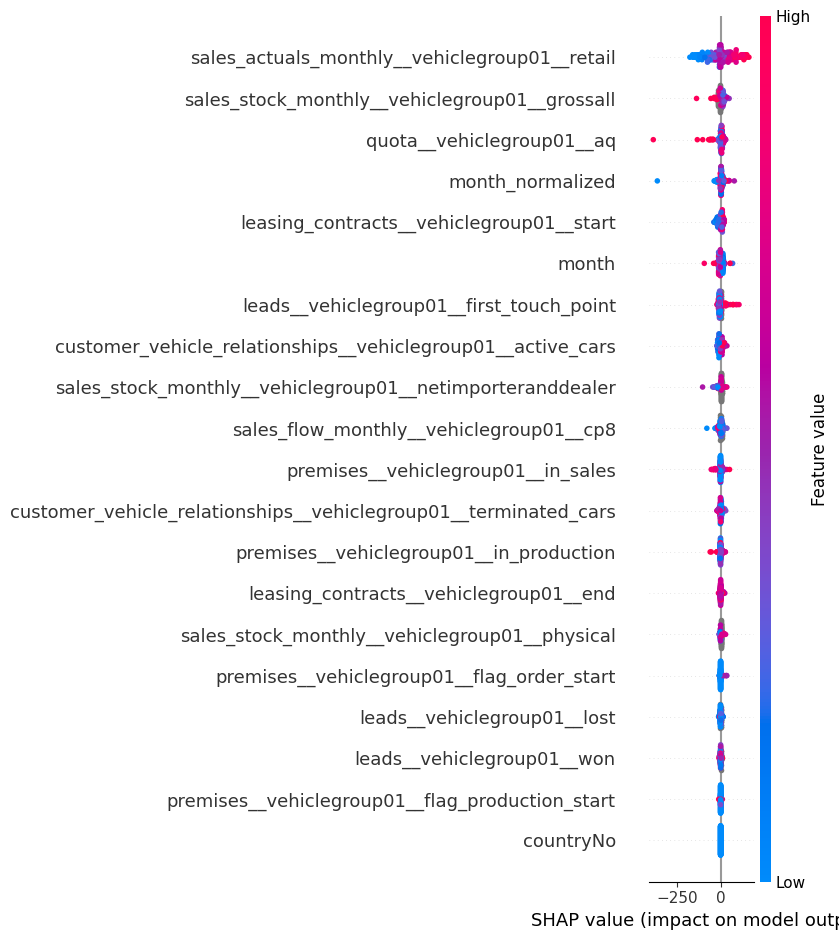

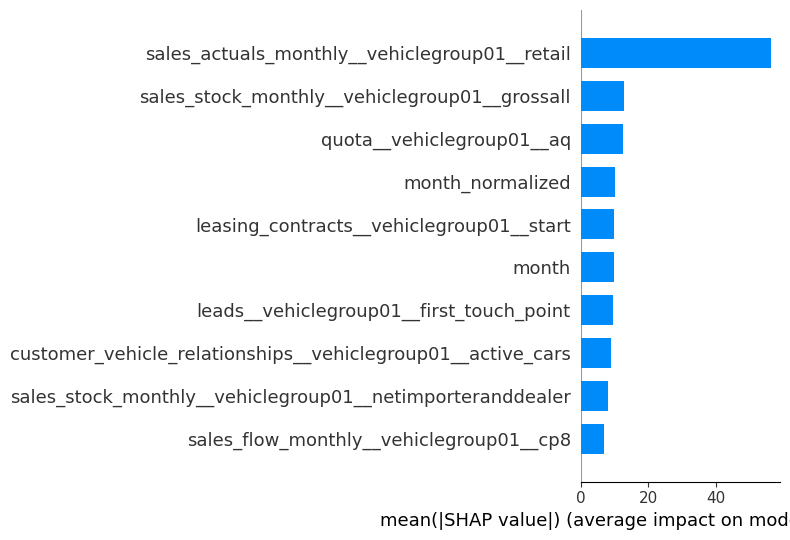

In [47]:
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar', max_display=10)